# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [4]:
# Library dasar untuk manipulasi data
import numpy as np
import pandas as pd

# Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing dan machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Sistem / utilitas
import os
import warnings
warnings.filterwarnings("ignore")

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [19]:
# Membaca dataset dari file CSV
df = pd.read_csv("spotify_churn_dataset.csv")

# Menampilkan 5 baris pertama untuk memastikan dataset terbaca
df.head()

,user_id,gender,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening,is_churned
0,1,Female,54,CA,Free,26,23,0.20,Desktop,31,0,1
1,2,Other,33,DE,Family,141,62,0.34,Web,0,1,0
2,3,Male,38,AU,Premium,199,38,0.04,Mobile,0,1,1
3,4,Female,22,CA,Student,36,2,0.31,Mobile,0,1,0
4,5,Other,29,US,Family,250,57,0.36,Mobile,0,1,1


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [20]:
# Melihat dimensi dataset
print("Jumlah baris dan kolom:", df.shape)

# Melihat tipe data tiap kolom dan non-null count
df.info()

Jumlah baris dan kolom: (8000, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                8000 non-null   int64  
 1   gender                 8000 non-null   object 
 2   age                    8000 non-null   int64  
 3   country                8000 non-null   object 
 4   subscription_type      8000 non-null   object 
 5   listening_time         8000 non-null   int64  
 6   songs_played_per_day   8000 non-null   int64  
 7   skip_rate              8000 non-null   float64
 8   device_type            8000 non-null   object 
 9   ads_listened_per_week  8000 non-null   int64  
 10  offline_listening      8000 non-null   int64  
 11  is_churned             8000 non-null   int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 750.1+ KB


In [21]:
# Statistik deskriptif untuk kolom numerik
df.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,8000.0,4000.500000,2309.545410,1.0,2000.75,4000.5,6000.25,8000.0
age,8000.0,37.662125,12.740359,16.0,26.00,38.0,49.00,59.0
listening_time,8000.0,154.068250,84.015596,10.0,81.00,154.0,227.00,299.0
songs_played_per_day,8000.0,50.127250,28.449762,1.0,25.00,50.0,75.00,99.0
skip_rate,8000.0,0.300127,0.173594,0.0,0.15,0.3,0.45,0.6
ads_listened_per_week,8000.0,6.943875,13.617953,0.0,0.00,0.0,5.00,49.0
offline_listening,8000.0,0.747750,0.434331,0.0,0.00,1.0,1.00,1.0
is_churned,8000.0,0.258875,0.438044,0.0,0.00,0.0,1.00,1.0


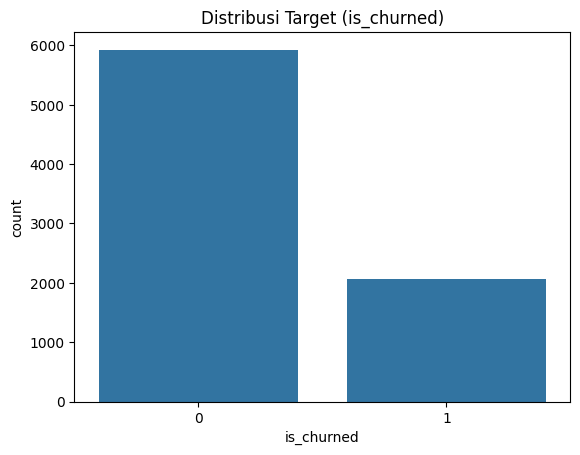

Distribusi nilai target:
is_churned
0    0.741125
1    0.258875
Name: proportion, dtype: float64


In [22]:
# Distribusi variabel target (is_churned)
sns.countplot(x="is_churned", data=df)
plt.title("Distribusi Target (is_churned)")
plt.show()

print("Distribusi nilai target:")
print(df["is_churned"].value_counts(normalize=True))

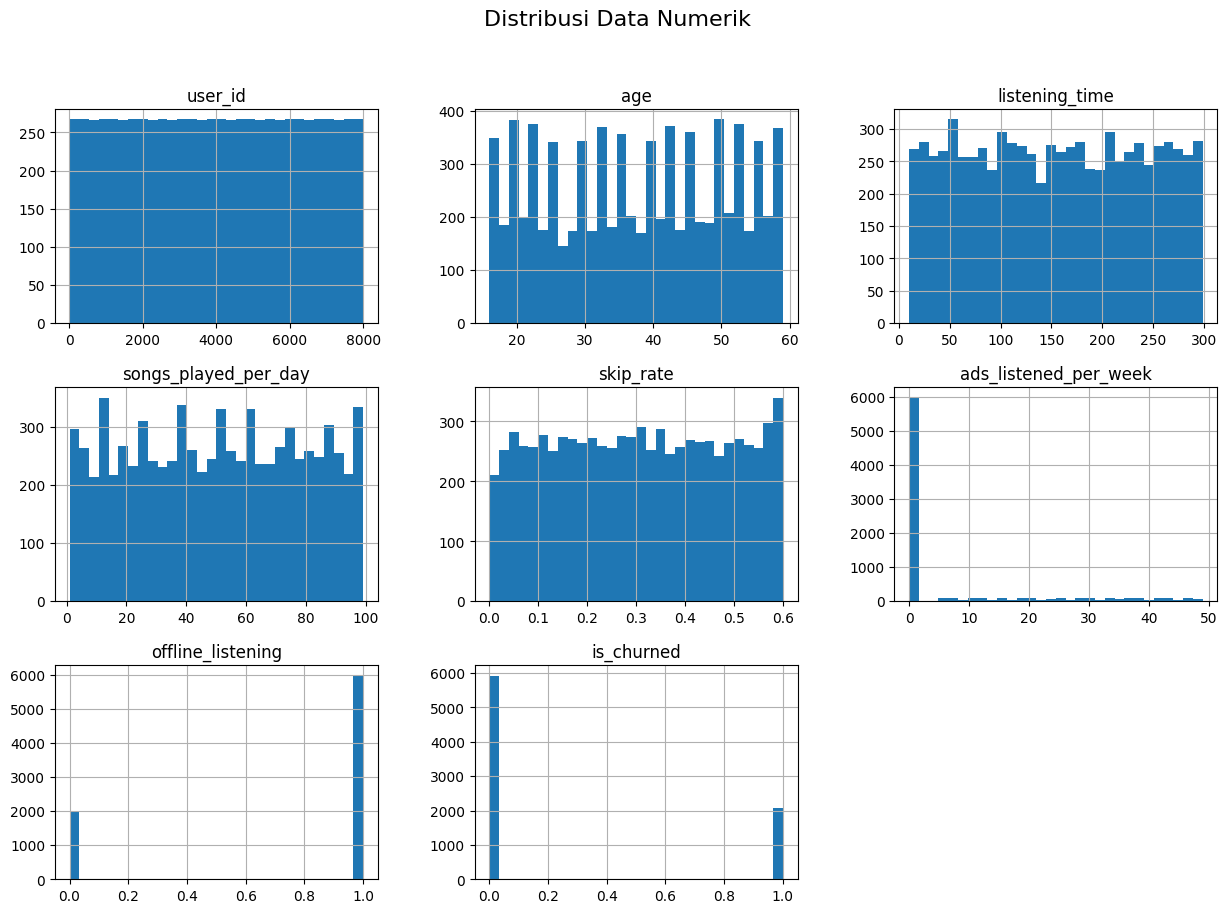

In [23]:
# Distribusi fitur numerik
df.hist(bins=30, figsize=(15, 10))
plt.suptitle("Distribusi Data Numerik", size=16)
plt.show()

Kolom numerik: ['user_id', 'age', 'listening_time', 'songs_played_per_day', 'skip_rate', 'ads_listened_per_week', 'offline_listening', 'is_churned']


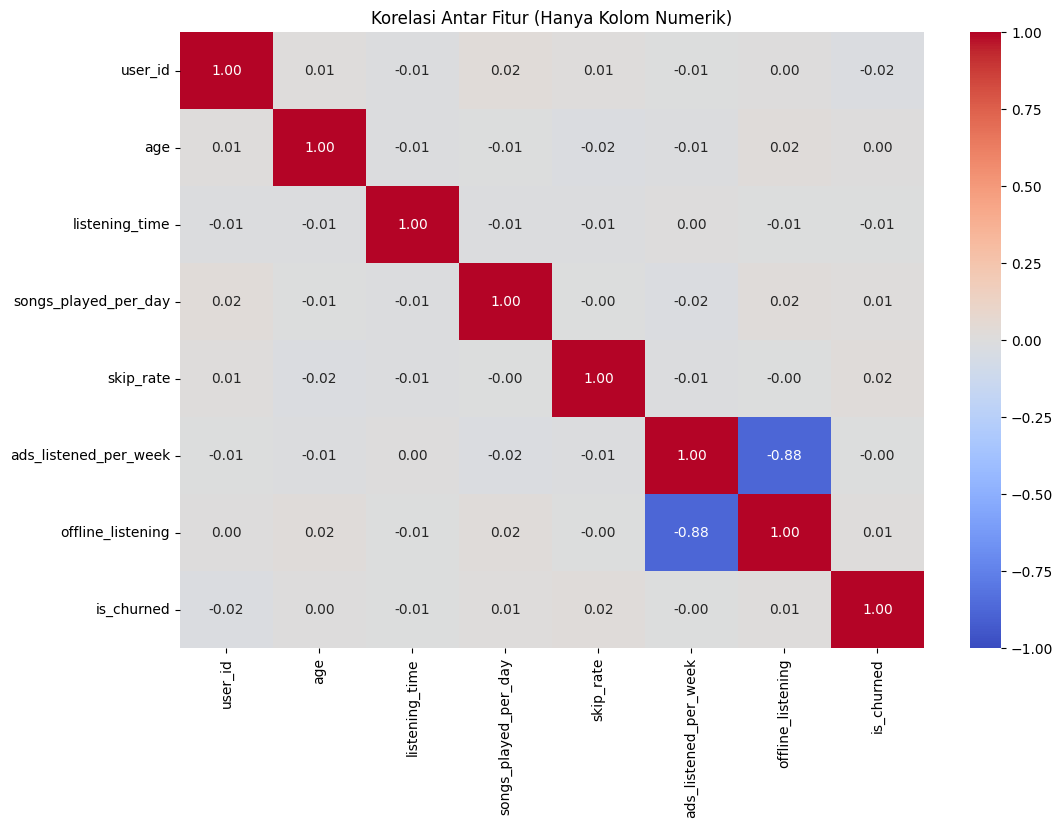

In [24]:
# Pilih kolom numerik saja
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("Kolom numerik:", num_cols)

# Hitung korelasi dan plot heatmap
corr = df[num_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Korelasi Antar Fitur (Hanya Kolom Numerik)")
plt.show()

Unique values target setelah konversi: [1 0]
Missing pada target setelah konversi: 0
Top features (berdasarkan korelasi absolut dengan target):
skip_rate                    0.016121
user_id                      0.015994
device_type_Mobile           0.015955
country_PK                   0.014144
country_IN                   0.013504
device_type_Web              0.013392
offline_listening            0.012754
subscription_type_Free       0.012754
country_DE                   0.012211
subscription_type_Premium    0.011338
gender_Male                  0.011254
country_FR                   0.011247
country_UK                   0.009698
songs_played_per_day         0.009314
country_CA                   0.008776
listening_time               0.007624
gender_Other                 0.004839
country_US                   0.004392
age                          0.003982
subscription_type_Student    0.003892
Name: is_churned, dtype: float64


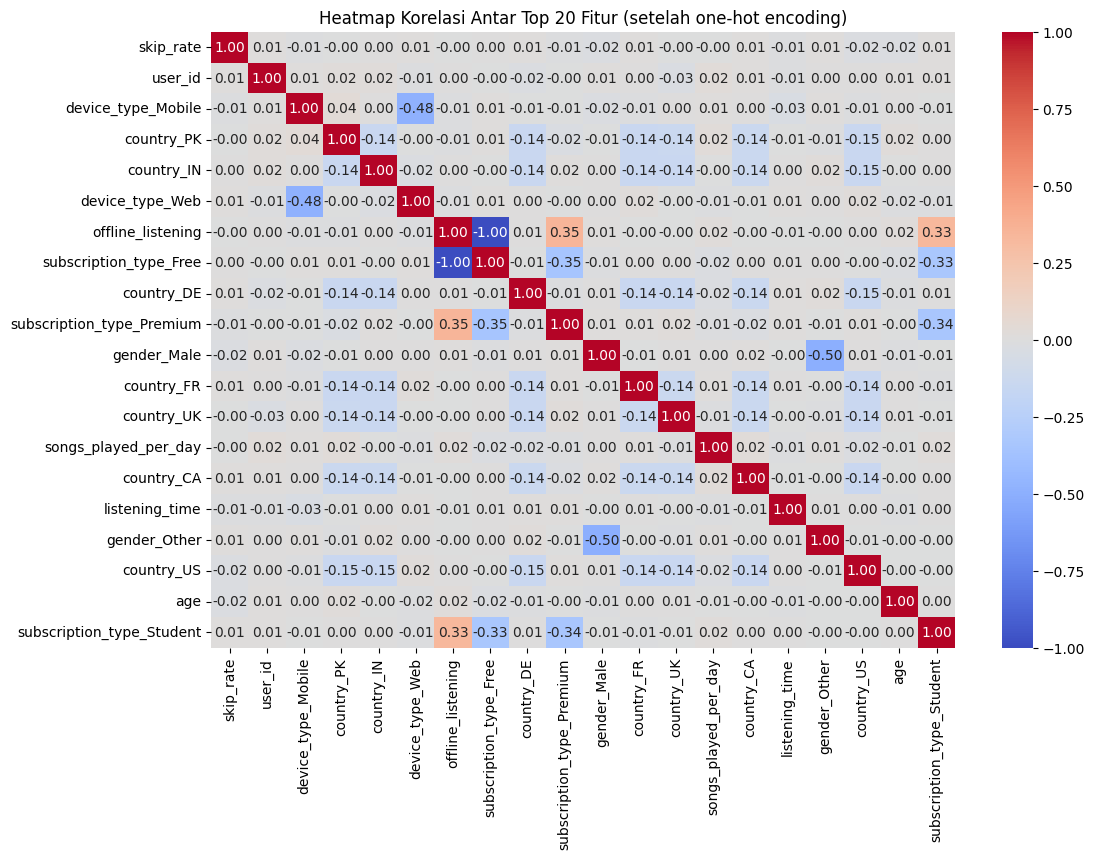

In [25]:
# Pastikan target 'is_churned' sudah numeric
df['is_churned'] = pd.to_numeric(df['is_churned'], errors='coerce')
print("Unique values target setelah konversi:", df['is_churned'].unique())
print("Missing pada target setelah konversi:", df['is_churned'].isna().sum())

# One-hot encode semua kolom object/category
df_encoded = pd.get_dummies(df, drop_first=True)

# Pastikan target ada di df_encoded
target = 'is_churned'
if target not in df_encoded.columns:
    raise ValueError(f"Target '{target}' tidak ada setelah encoding.")

# Hitung korelasi terhadap target
corr_with_target = df_encoded.corr()[target].abs().sort_values(ascending=False)
top_features = corr_with_target.index[1:21].tolist()

print("Top features (berdasarkan korelasi absolut dengan target):")
print(corr_with_target[1:21])

plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded[top_features].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Heatmap Korelasi Antar Top 20 Fitur (setelah one-hot encoding)")
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [26]:
# Drop kolom identifier yang tidak relevan
df_prep = df.drop(columns=["user_id"])

# Menangani missing values
for col in df_prep.columns:
    if df_prep[col].dtype in ["int64", "float64"]:
        df_prep[col].fillna(df_prep[col].median(), inplace=True)
    else:
        df_prep[col].fillna(df_prep[col].mode()[0], inplace=True)

# Menghapus duplikasi
df_prep = df_prep.drop_duplicates()

print("Dimensi data setelah preprocessing awal:", df_prep.shape)

Dimensi data setelah preprocessing awal: (8000, 11)


In [27]:
# Pisahkan fitur dan target
X = df_prep.drop(columns=["is_churned"])
y = df_prep["is_churned"]

# One-hot encoding untuk variabel kategorikal
X = pd.get_dummies(X, drop_first=True)

print("Dimensi data setelah encoding:", X.shape)

Dimensi data setelah encoding: (8000, 20)


In [28]:
# Standarisasi hanya pada kolom numerik
num_cols = ['age', 'listening_time', 'songs_played_per_day', 'skip_rate', 'ads_listened_per_week']
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

# Split data menjadi train & test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Dimensi train:", X_train.shape)
print("Dimensi test :", X_test.shape)

Dimensi train: (6400, 20)
Dimensi test : (1600, 20)
